**Sentiment Analysis with Financial News Headlines**


The first project is about the stocks sentiment analysis with using python


I use Finviz to collect the financial news headlines
finwiz_url = 'https://finviz.com/quote.ashx?t='

In order to perform sentiment analysis, we need to do some 'Scoring' for each headlines.
Here I use NLTK VADER library https://www.nltk.org/api/nltk.sentiment.html

In [17]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [18]:
news_tables = {}
tickers = ['AAPL','TSLA','GOOGL','FB']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table


In [19]:
# Read one single day of headlines for 'TSLA' 
TSLA = news_tables['TSLA']
# Get all the table rows tagged in HTML with <tr> into 'MRK_tr'
TSLA_tr = TSLA.findAll('tr')

for i, table_row in enumerate(TSLA_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

5 Best Chinese Stocks To Buy And Watch Amid Beijing Crackdowns, Evergrande Default Fears
Oct-09-21 08:46AM  
Dow Jones Futures: Market Rally, 5 Stocks At Inflection Point; Tesla FSD Beta Rollout Delayed
08:45AM  
Tesla, GM Lead 5 EV Stocks Near Buy Points
08:44AM  
Elon Musk throws a party at Tesla's factory near Berlin
02:14AM  


In [20]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news


[['AAPL', 'Oct-09-21', '06:35AM', 'Is Outbrain Stock a Buy?'],
 ['AAPL',
  'Oct-08-21',
  '08:54PM',
  "Theaters in Bond-like No Time to Die' survival mode as Hollywood banks on return"],
 ['AAPL',
  'Oct-08-21',
  '07:08PM',
  'Apple Seeks to Delay Ruling Loosening Its Grip on App Store'],
 ['AAPL',
  'Oct-08-21',
  '07:01PM',
  'Apple asks judge to pause Epic Games antitrust orders as it appeals ruling'],
 ['AAPL',
  'Oct-08-21',
  '06:59PM',
  'Apple seeks to avoid allowing developers to link out to other payment options in Epic appeal'],
 ['AAPL',
  'Oct-08-21',
  '05:36PM',
  "Narrow Impact for Microsoft's (MSFT) New OS and Hardware"],
 ['AAPL',
  'Oct-08-21',
  '03:49PM',
  'Apples New Watch Is in Tight Supply, Leading to Long Wait Times'],
 ['AAPL',
  'Oct-08-21',
  '01:21PM',
  'Big Tech, Saudi Oil, and the Pursuit of $100 Billion Profits'],
 ['AAPL',
  'Oct-08-21',
  '01:00PM',
  'Apple Stock Remains a Buy Despite Supply Chain Challenges, Says J.P. Morgan'],
 ['AAPL', 'Oct-08-

In [21]:
  >>> import nltk
  >>> nltk.download('vader_lexicon')
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,ticker,date,time,headline,neg,neu,pos,compound
0,AAPL,2021-10-09,06:35AM,Is Outbrain Stock a Buy?,0.000,1.000,0.0,0.0000
1,AAPL,2021-10-08,08:54PM,Theaters in Bond-like No Time to Die' survival...,0.337,0.663,0.0,-0.7269
2,AAPL,2021-10-08,07:08PM,Apple Seeks to Delay Ruling Loosening Its Grip...,0.187,0.813,0.0,-0.3182
3,AAPL,2021-10-08,07:01PM,Apple asks judge to pause Epic Games antitrust...,0.000,1.000,0.0,0.0000
4,AAPL,2021-10-08,06:59PM,Apple seeks to avoid allowing developers to li...,0.128,0.872,0.0,-0.2960


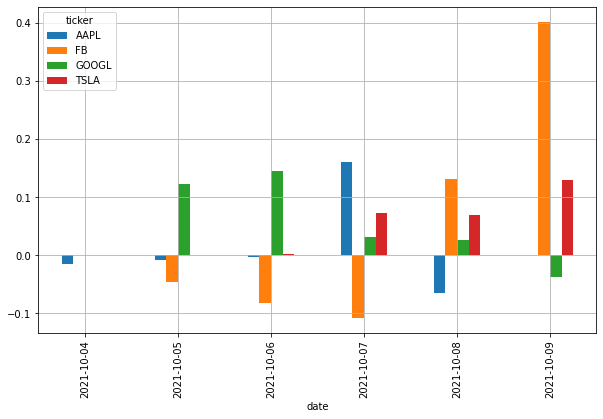

In [22]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()